<a href="https://colab.research.google.com/github/Schwarzam/Testes-Deep-Learning/blob/master/dogs_cats_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import shutil
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/trainsets/train.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-07-25 18:45:43--  https://storage.googleapis.com/trainsets/train.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 66.102.1.128, 142.250.13.128, 74.125.206.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|66.102.1.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 569546721 (543M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>] 543.16M  50.0MB/s    in 14s     

2020-07-25 18:45:59 (40.2 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [569546721/569546721]



In [ ]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/cats-dogs/')
zip_ref.close()

In [ ]:
base_dir = '/tmp/cats-dogs/train'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


try:
  os.mkdir(train_dir)
  os.mkdir(validation_dir)
  os.mkdir(train_cats_dir)
  os.mkdir(train_dogs_dir)
  os.mkdir(validation_cats_dir)
  os.mkdir(validation_dogs_dir)
except:
  pass

In [ ]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500)]
for fname in fnames:
  src = os.path.join(base_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500)]
for fname in fnames:
  src = os.path.join(base_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(base_dir, fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(base_dir, fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src, dst)

In [ ]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

Using TensorFlow backend.


58892288/58889256 [==============================] - 3s 0us/step


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [ ]:
def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 512))
  labels = np.zeros(shape=(sample_count))
  generator = datagen.flow_from_directory(
      directory,
      target_size = (150,150),
      batch_size = batch_size,
      class_mode = 'binary'
  )
  i = 0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i * batch_size : (i+1) * batch_size] = features_batch
    labels[i * batch_size : (i+1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= sample_count:
      break
  return features, labels

In [ ]:
train_features, train_labels = extract_features(train_dir, 3000)
validation_features, validation_labels = extract_features(validation_dir, 1000)

Found 3000 images belonging to 2 classes.


In [ ]:
train_features = np.reshape(train_features, (3000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))

In [ ]:
from keras import models, layers, optimizers

model = models.Sequential()

model.add(layers.Dense(256, activation = 'relu', input_dim =  (4 * 4 * 512)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = optimizers.RMSprop(lr=2e-5),
              loss = 'binary_crossentropy',
              metrics = ['acc'])


TypeError: ignored

In [ ]:
history = model.fit(train_features, train_labels,
                    epochs = 30,
                    batch_size = 20,
                    validation_data = (validation_features, validation_labels))

Train on 3000 samples, validate on 1000 samples
Epoch 1/30
3000/3000 [==============================] - 1s 432us/step - loss: 0.5458 - acc: 0.7153 - val_loss: 0.3963 - val_acc: 0.8360
Epoch 2/30
3000/3000 [==============================] - 1s 351us/step - loss: 0.3712 - acc: 0.8433 - val_loss: 0.3329 - val_acc: 0.8560
Epoch 3/30
3000/3000 [==============================] - 1s 349us/step - loss: 0.3086 - acc: 0.8737 - val_loss: 0.3044 - val_acc: 0.8700
Epoch 4/30
3000/3000 [==============================] - 1s 349us/step - loss: 0.2778 - acc: 0.8887 - val_loss: 0.2933 - val_acc: 0.8740
Epoch 5/30
3000/3000 [==============================] - 1s 352us/step - loss: 0.2581 - acc: 0.8957 - val_loss: 0.2791 - val_acc: 0.8740
Epoch 6/30
3000/3000 [==============================] - 1s 352us/step - loss: 0.2314 - acc: 0.9080 - val_loss: 0.2720 - val_acc: 0.8750
Epoch 7/30
3000/3000 [==============================] - 1s 351us/step - loss: 0.2219 - acc: 0.9187 - val_loss: 0.2629 - val_acc: 0.8790


In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

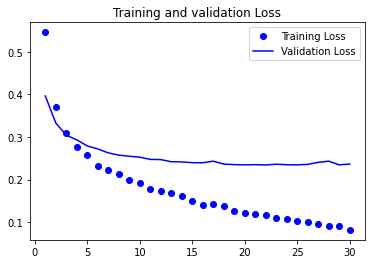

In [ ]:
epochs = range(1, len(acc)+1)
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.show()

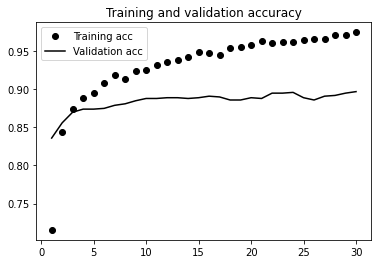

In [ ]:
plt.plot(epochs, acc, 'ko', label='Training acc')
plt.plot(epochs, val_acc, 'k', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

In [ ]:
from PIL import Image
import numpy as np
from skimage import transform
def load(filename):
   np_image = Image.open(filename)
   np_image = np.array(np_image).astype('float32')/255
   np_image = transform.resize(np_image, (150, 150, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
model.save("/content/drive/My Drive/TrainSets/Cats-dogs-model")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from keras.preprocessing.image import load_img, img_to_array, array_to_img
from scipy import signal

image = load_img(
    "/content/drive/My Drive/TrainSets/gato.jpg", grayscale=False, color_mode="rgb", target_size=(150,150), interpolation="nearest")

img_tensor = img_to_array(image)
#img_tensor = np.expand_dims(img_tensor, axis=0)
#img_tensor /= 255.
#img_tensor.shape

In [ ]:
image_8192 = signal.resample(img_tensor.ravel(), 8192)

image_8192 = np.expand_dims(image_8192, axis=0)
image_8192.shape

(1, 8192)

In [ ]:
plt.imshow(img_tensor[0])
plt.show()

In [ ]:
prediction = model.predict(image_8192)
print(prediction)

[[1.]]


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 2,097,665
Trainable params: 2,097,665
Non-trainable params: 0
_________________________________________________________________
